In [115]:
%matplotlib inline
import yfinance as yf
import pandas as pd
from IPython.core.debugger import set_trace

In [155]:
assets = {
    'ACWI': 'acwi_ishares_acwi',
    'SPY' : 'spy_spdr_us',
    
    'RXI' : 'rxi_ishares_consumer_disc_global',
    'KXI' : 'kxi_ishares_consumer_stp_global',
    'IXC' : 'ixc_ishares_energy_global',
    'IXG' : 'ixg_ishares_financial_global',
    'IXJ' : 'ixj_ishares_healthcare_global',
    'EXI' : 'exi_ishares_industrial_global',
    'MXI' : 'mxi_ishares_material_global',
    'IXN' : 'ixn_ishares_tech_global',
    'IXP' : 'ixp_ishares_telcom_global',
    'JXI' : 'jxi_ishares_util_global',
    'RWX' : 'rwx_spdr_global_reit',

    'CARZ' : 'carz_firstrust_automotive',
    'IYC' : 'iyc_ishares_consumer_service',
    'BJK' : 'bjk_vaneck_gaming',
    'PBS' : 'pbs_invesco_media',
    'IBUY' : 'ibuy_amplify_online_retail',

    'IYK' : 'iyk_ishares_consumer_goods',
    'PBJ' : 'pbj_invesco_food_beverage',

    'AMLP' : 'amlp_alerian_mlp',
    'FCG' : 'fcg_firstrust_natural_gas',
    'XOP' : 'xop_spdr_exploration',
    'OIH' : 'oih_vaneck_oil_service',
    'TAN' : 'tan_invesco_solar',
    'FAN' : 'fan_firstrust_wind',

    'KBE' : 'kbe_spdr_bank',
    'IAI' : 'iai_ishares_broker',
    'BIZD' : 'bizd_vaneck_bdc',
    'KCE' : 'kce_spdr_capital_market',
    'QABA' : 'qaba_firstrust_community_bank',
    'IYG' : 'iyg_ishares_financial_service',
    'KIE' : 'kie_spdr_insurance',
    'PSP' : 'psp_invesco_pe',
    'KRE' : 'kre_spdr_regional_bank',

    'IBB' : 'ibb_ishares_bio',
    'IHF' : 'ihf_ishares_healthcare_service',
    'IHI' : 'ihi_ishares_medical_device',
    'PJP' : 'pjp_invesco_pharma',

    'ITA' : 'ita_ishares_aerospace',
    'JETS' : 'jets_usglobal_airlines',
    'IYT' : 'iyt_ishares_transportation',
    'CGW' : 'cgw_invesco_water',

    'MOO' : 'moo_vaneck_agribiz',
    'GDX' : 'gdx_vaneck_gold_miner',
    'SIL' : 'sil_globalx_silver_miner',
    'ITB' : 'itb_ishares_homebuilder',
    'LIT' : 'lit_globalx_lithium',
    'PICK' : 'pick_ishares_metal_mining',
    'GUNR' : 'gunr_flexshares_natural_resource',
    'SLX' : 'slx_vaneck_steel',
    'WOOD' : 'wood_ishares_timber',
    'URA' : 'ura_globalx_uranium',

    'SKYY' : 'skyy_firstrust_cloud',
    'FDN' : 'fdn_firstrust_internet',
    'CIBR' : 'cibr_firstrust_cybersecurity',
    'PXQ' : 'pxq_invesco_networking',
    'SOXX' : 'soxx_ishares_semiconductor',
    'SOCL' : 'socl_globalx_sns',
    'IGV' : 'igv_ishares_software',

    'IGF' : 'igf_ishares_infra',

    'VNQ' : 'vnq_vanguard_us_reit',
    'REM' : 'rem_ishares_us_mortgage_reit',
    
    'QUAL' : 'qual_ishares_qual',
    'IVE' : 'ive_ishares_value',
    'IVW' : 'ivw_ishares_growth',
    'MTUM' : 'mtum_ishares_mtum',
    'EEMO' : 'eemo_pshares_mtum_em',
    'VIG' : 'vig_vanguard_dvd_apprec',
    'DVY' : 'dvy_ishares_high_dvd',
    'SPHB' : 'sphb_pshares_high_beta',
    'USLB' : 'uslb_pshares_low_beta',
    'SPLV' : 'splv_pshares_low_vol',
    'COWZ' : 'cowz_pacer_fcf',
    'DEF' : 'def_pshares_defensive',
    'EUSA' : 'eusa_ishares_ew',
    'CSM' : 'csm_pshares_130_30',
    'SHE' : 'she_spdr_gender',
    'QYLD' : 'qyld_horizons_covered_call',
    'GVIP' : 'gvip_gs_hedgefund_hold',
    'MOAT' : 'moat_vaneck_moat',
    'FTLS' : 'ftls_firstrust_long_short',
    'WTMF' : 'wtmf_wisdomtree_mgd_futs',
    'MNA' : 'mna_iq_m&a',
    'SUSA' : 'susa_ishares_esg',
    'IPO' : 'ipo_renaissance_ipo',
    'KNOW' : 'know_direxion_insider',
    'NFO' : 'nfo_pshares_insider',
    'IWM' : 'iwm_ishares_smallcap',
    'XRLV' : 'xrlv_pshares_xrate_sen_lowvol',
}

In [156]:
symbols = ' '.join(assets.keys())
start = '2008-12-20'
end = '2020-10-05'
db = yf.download(symbols, start=start, end=end, threads=True)['Adj Close']
db = db.rename(columns=assets).fillna(method='ffill')

[*********************100%***********************]  90 of 90 completed


In [150]:
def rebuild(symbol, pkl='prices_global.pkl'):
    market = db[symbol]
    support = pd.read_pickle(pkl).reprice.unstack()[symbol].loc[market.index[0]:]
    df_r = pd.DataFrame({'support':support, 'market':market}).fillna(method='ffill').pct_change()
    df_p = (df_r.market.combine_first(df_r.support).fillna(0) + 1).cumprod()
    return df_p / df_p[-1] * market[-1]

<AxesSubplot:xlabel='Date'>

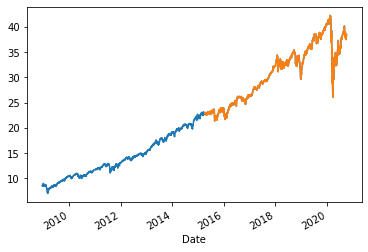

In [151]:
rebuild('xrlv_pshares_xrate_sen_lowvol', pkl='prices_global.pkl').plot()
db['xrlv_pshares_xrate_sen_lowvol'].plot()

In [157]:
for name in assets.values():
    db[name] = rebuild(name, pkl='prices_global.pkl')

In [158]:
pkl = pd.DataFrame()
pkl['close'] = db.stack()
pkl['high'] = db.stack()
pkl['low'] = db.stack()
pkl['underlying'] = db.stack()
pkl['reprice'] = db.stack(); pkl

close       high        low  \
Date                                                                        
2008-12-19 acwi_ishares_acwi              24.765001  24.765001  24.765001   
           amlp_alerian_mlp               16.443199  16.443199  16.443199   
           bizd_vaneck_bdc                 3.527480   3.527480   3.527480   
           bjk_vaneck_gaming              12.103403  12.103403  12.103403   
           carz_firstrust_automotive      24.894752  24.894752  24.894752   
...                                             ...        ...        ...   
2020-10-02 vnq_vanguard_us_reit           81.930000  81.930000  81.930000   
           wood_ishares_timber            65.930000  65.930000  65.930000   
           wtmf_wisdomtree_mgd_futs       34.750000  34.750000  34.750000   
           xop_spdr_exploration           41.619999  41.619999  41.619999   
           xrlv_pshares_xrate_sen_lowvol  38.255001  38.255001  38.255001   

                                          underlying    reprice  
Date                                                             
2008-12-19 acwi_ishares_acwi               24.765001  24.765001  
           amlp_alerian_mlp                16.443199  16.443199  
           bizd_vaneck_bdc                  3.527480   3.527480  
           bjk_vaneck_gaming               12.103403  12.103403  
           carz_firstrust_automotive       24.894752  24.894752  
...                                              ...        ...  
2020-10-02 vnq_vanguard_us_reit            81.930000  81.930000  
           wood_ishares_timber             65.930000  65.930000  
           wtmf_wisdomtree_mgd_futs        34.750000  34.750000  
           xop_spdr_exploration            41.619999  41.619999  
           xrlv_pshares_xrate_sen_lowvol   38.255001  38.255001  

[267030 rows x 5 columns]

In [159]:
pkl.to_pickle('global_20201005.pkl')

# 여기서부터 시작

In [4]:
db = pd.read_pickle('db 20200619.pkl')

In [6]:
dates = db.index[250*5-1:-250:5]; dates

DatetimeIndex(['2009-10-02', '2009-10-09', '2009-10-16', '2009-10-23',
               '2009-10-30', '2009-11-06', '2009-11-13', '2009-11-20',
               '2009-11-27', '2009-12-04',
               ...
               '2019-05-03', '2019-05-10', '2019-05-17', '2019-05-24',
               '2019-05-31', '2019-06-07', '2019-06-14', '2019-06-21',
               '2019-06-28', '2019-07-05'],
              dtype='datetime64[ns]', name='Date', length=510, freq='5B')

In [7]:
nback = 250*5
date = dates[-1]
db_ = db.loc[:date].iloc[-nback:]
# reducer = FastICA(n_components=3, random_state=0)
pricer = pr.Pricer(db_, reducer=None, prob=0.80, howfar=250, progress=True)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [25]:
nfwds = [5,10,15,20,40,60,80,100,120,140,160,180,200,220,240]

def evaluate_relperf(pricer):
    r_actual = db.loc[pricer.asof:].iloc[[0]+nfwds]
    r_actual = (r_actual / r_actual.iloc[0] - 1).iloc[1:]
    r_actual.index = nfwds
    r_forecast = pd.DataFrame({nfwd:pricer.stats(nfwd=nfwd, up_thres=0.005).rband_fair for nfwd in nfwds}).T
    return r_actual.corrwith(r_forecast, axis=1)

def evaluate_hit(pricer):
    r_actual = db.loc[pricer.asof:].iloc[[0]+nfwds]
    r_actual = (r_actual / r_actual.iloc[0] - 1).iloc[1:]
    r_actual.index = nfwds
    r_forecast = pd.DataFrame({nfwd:pricer.stats(nfwd=nfwd, up_thres=0.005).rband_fair for nfwd in nfwds}).T
    return ((r_actual * r_forecast)>0).sum(axis=1) / len(r_actual.columns)

In [26]:
evaluate_hit(pricer)

5      0.586957
10     0.565217
15     0.456522
20     0.369565
40     0.760870
60     0.782609
80     0.630435
100    0.586957
120    0.543478
140    0.565217
160    0.695652
180    0.717391
200    0.739130
220    0.782609
240    0.717391
dtype: float64

In [9]:
evaluate_relperf(pricer)

5     -0.343807
10     0.254604
15    -0.492258
20     0.437500
40     0.551200
60     0.737593
80    -0.011577
100   -0.194555
120   -0.096033
140    0.312228
160    0.544140
180    0.183908
200    0.552451
220    0.588834
240    0.556858
dtype: float64

In [37]:
import asyncio
nback = 250*2
evaluator = evaluate_hit

async def evalute(date):
    db_ = db.loc[:date].iloc[-nback:]
    pricer = await loop.run_in_executor(None, pr.Pricer, db_)
    print(date)
    return date, await loop.run_in_executor(None, evaluator, pricer)

async def main():
    fts = [asyncio.ensure_future(evalute(date)) for date in dates[:]]
    return await asyncio.gather(*fts)


result = None
asyncio.set_event_loop(asyncio.new_event_loop())
loop = asyncio.get_event_loop()

try:
    # 다음 코드를 주피터에서 돌리려면, tornado를 downgrade 해야함
    # pip install tornado==4.5.3
    result = loop.run_until_complete(main())
    result = pd.DataFrame(dict(result)).T

except Exception as ex:
    print(ex)

finally:
    loop.close()

2010-01-29 00:00:00
2010-02-05 00:00:00
2009-11-06 00:00:00
2009-11-27 00:00:00
2010-01-15 00:00:00
2009-12-04 00:00:00
2010-02-12 00:00:00
2010-01-08 00:00:00
2010-01-01 00:00:00
2009-12-11 00:00:00
2009-11-13 00:00:00
2009-11-20 00:00:00
2010-01-22 00:00:00
2009-12-25 00:00:00
2009-12-18 00:00:00
2009-10-16 00:00:00
2009-10-23 00:00:00
2009-10-09 00:00:00
2009-10-02 00:00:00
2009-10-30 00:00:00
2010-02-26 00:00:00
2010-04-09 00:00:00
2010-04-23 00:00:00
2010-03-19 00:00:00
2010-02-19 00:00:00
2010-04-30 00:00:00
2010-03-12 00:00:00
2010-03-05 00:00:00
2010-04-02 00:00:00
2010-04-16 00:00:00
2010-03-26 00:00:00
2010-05-07 00:00:00
2010-05-28 00:00:00
2010-05-14 00:00:00
2010-05-21 00:00:00
2010-06-04 00:00:00
2010-06-11 00:00:00
2010-06-25 00:00:00
2010-06-18 00:00:00
2010-07-02 00:00:00
2010-07-09 00:00:00
2010-07-16 00:00:00
2010-07-23 00:00:00
2010-08-13 00:00:00
2010-08-06 00:00:00
2010-07-30 00:00:00
2010-08-20 00:00:00
2010-08-27 00:00:00
2010-09-03 00:00:00
2010-10-01 00:00:00


In [38]:
result.to_pickle('hit2y.pkl')

In [29]:
result = pd.read_pickle('hit4y.pkl')

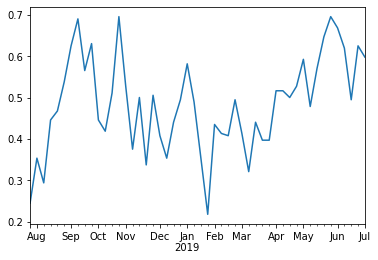

In [30]:
# 5y
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

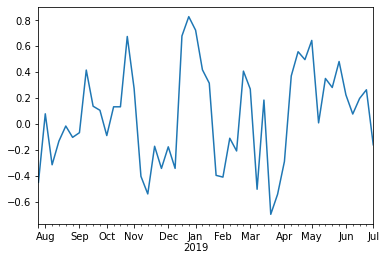

In [12]:
# 4y
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

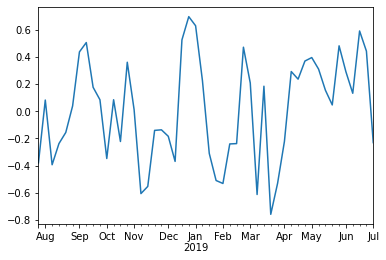

In [16]:
# 3y
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

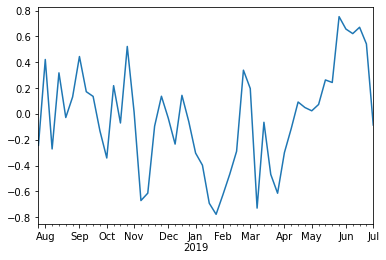

In [28]:
# 2y
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

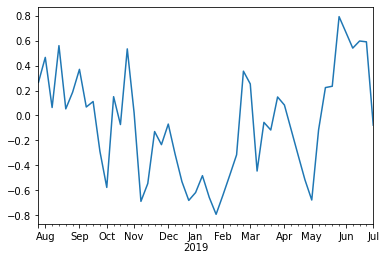

In [19]:
# 1y
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

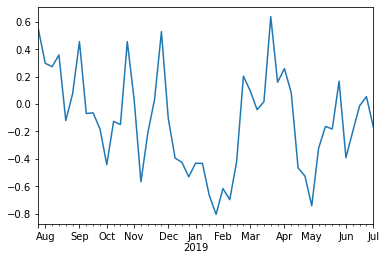

In [22]:
# 6m
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

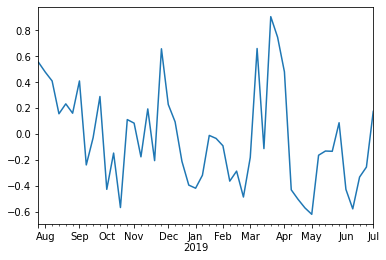

In [25]:
# 3m
result[[5,10,15,20]].mean(axis=1).iloc[-50:].plot()

In [118]:
def cal_hit():
    hits = []
    for i, nfwd in list(enumerate(nfwds))[1:]:
        forecast = pricer.stats(nfwd=nfwd, up_thres=0.01)
        actual = df.iloc[i]
        #hit = dir_actual * dir_forecast > 0
        #hits.append((nfwd, hit.sum() / len(hit)))
        hits.append((nfwd, actual.corr(forecast.rband_fair)))
        
    return hits

In [119]:
cal_hit()

[(5, 0.4587860636812362),
 (10, -0.5323863816203396),
 (15, 0.5538399041533946),
 (20, -0.5989687090310699),
 (40, -0.5406484852584688),
 (60, -0.3374884127769239),
 (80, 0.22819751012790343),
 (100, 0.30337596438527525),
 (120, 0.6445786632159642),
 (140, 0.627167799915445),
 (160, 0.4810250197861885),
 (180, -0.6509773273411951),
 (200, -0.48066130015966035),
 (220, -0.31227124851051014),
 (240, -0.12807304537028918)]

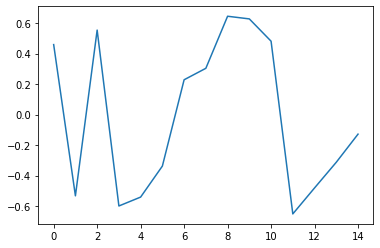

In [98]:
pd.Series(list(zip(*cal_hit()))[1]).plot()

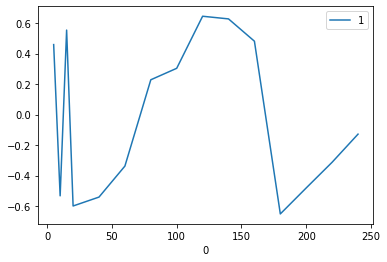

In [102]:
pd.DataFrame(cal_hit()).set_index(0).plot()